# L-channel PDS
## Analysis of experiment #1 

TIMEOUT = 900 (seconds)</br>
NRUNS = 5</br>
ALL-Z = False (not all vertices can propagate)</br>

## Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style 
import seaborn as sns
import functools
from math import ceil, isnan
import numpy as np

## Read stats

In [2]:
# Read .csv (the output of stats1.py)
filename = "stats1.csv"
timeout = 900000000 # 900000000 microseconds = 900 seconds = 15 minutes
df = pd.read_csv(filename, index_col=0)

Clean the data.

In [3]:
# Change column name "omega" to "L"
df = df.rename(columns={"omega": "L"})

# Rearrange L to start from 0
df.L = df.L - 1

# Handle instances where no solution was found
df.loc[df.upper_bound == -1.0, "upper_bound"] = float("nan")
df.loc[df.gap == 100.0, "gap"] = float("nan")

# Handle instance with timeout
df.loc[df.result == "Timeout", "t_solver"] = timeout

# Clean instance names
df.instance = df.instance.apply(lambda x: x.split("/")[-1])
df.instance = df.instance.apply(lambda x: x.split(".")[0])

# Transform microseconds to seconds
timeout = int(900000000 / 1000000)
df.t_solver = df.t_solver / 1000000
df.t_callback = df.t_callback / 1000000

# Sort values
df = df.sort_values(["vertices", "solver", "L", "run"], ignore_index=True)
df

,solver,instance,vertices,edges,propagating_vertices,L,variables,constraints,run,lower_bound,upper_bound,gap,result,nodes,t_solver,callbacks,t_callback,lazy_constraints
0,brimkov,case4gs,4,4,0,0,16,8,0,4.0,4.0,0.0,Optimal,0,0.001373,0,0.0,0
1,brimkov,case4gs,4,4,0,0,16,8,1,4.0,4.0,0.0,Optimal,0,0.000273,0,0.0,0
2,brimkov,case4gs,4,4,0,0,16,8,2,4.0,4.0,0.0,Optimal,0,0.000191,0,0.0,0
3,brimkov,case4gs,4,4,0,0,16,8,3,4.0,4.0,0.0,Optimal,0,0.000185,0,0.0,0
4,brimkov,case4gs,4,4,0,0,16,8,4,4.0,4.0,0.0,Optimal,0,0.000191,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,jovanovic,case13659pegase,13659,18625,4024,41,77073,166797,0,2721.0,2721.0,0.0,Optimal,1736,120.598546,0,0.0,0
10996,jovanovic,case13659pegase,13659,18625,4024,41,77073,166797,1,2721.0,2721.0,0.0,Optimal,1736,118.491928,0,0.0,0
10997,jovanovic,case13659pegase,13659,18625,4024,41,77073,166797,2,2721.0,2721.0,0.0,Optimal,1736,118.967540,0,0.0,0
10998,jovanovic,case13659pegase,13659,18625,4024,41,77073,166797,3,2721.0,2721.0,0.0,Optimal,1736,118.103614,0,0.0,0


## Check solutions

In [4]:
def opt_val(serie):
    if serie.result == "Optimal":
        return serie.upper_bound
    else:
        return float("nan")

df["opt_val"] = df[["result", "upper_bound"]].apply(opt_val, axis=1)
df

,solver,instance,vertices,edges,propagating_vertices,L,variables,constraints,run,lower_bound,upper_bound,gap,result,nodes,t_solver,callbacks,t_callback,lazy_constraints,opt_val
0,brimkov,case4gs,4,4,0,0,16,8,0,4.0,4.0,0.0,Optimal,0,0.001373,0,0.0,0,4.0
1,brimkov,case4gs,4,4,0,0,16,8,1,4.0,4.0,0.0,Optimal,0,0.000273,0,0.0,0,4.0
2,brimkov,case4gs,4,4,0,0,16,8,2,4.0,4.0,0.0,Optimal,0,0.000191,0,0.0,0,4.0
3,brimkov,case4gs,4,4,0,0,16,8,3,4.0,4.0,0.0,Optimal,0,0.000185,0,0.0,0,4.0
4,brimkov,case4gs,4,4,0,0,16,8,4,4.0,4.0,0.0,Optimal,0,0.000191,0,0.0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,jovanovic,case13659pegase,13659,18625,4024,41,77073,166797,0,2721.0,2721.0,0.0,Optimal,1736,120.598546,0,0.0,0,2721.0
10996,jovanovic,case13659pegase,13659,18625,4024,41,77073,166797,1,2721.0,2721.0,0.0,Optimal,1736,118.491928,0,0.0,0,2721.0
10997,jovanovic,case13659pegase,13659,18625,4024,41,77073,166797,2,2721.0,2721.0,0.0,Optimal,1736,118.967540,0,0.0,0,2721.0
10998,jovanovic,case13659pegase,13659,18625,4024,41,77073,166797,3,2721.0,2721.0,0.0,Optimal,1736,118.103614,0,0.0,0,2721.0


In [5]:
for instance in df.instance.unique():
    df1 = df[df.instance == instance]
    for l in df1.L.unique():
        df2 = df1[df1.L == l]
        lb = df2.lower_bound.max()
        ub = df2.upper_bound.min()
        if (isnan(df2.opt_val.min())):
            # Check lower and upper bounds
            assert(lb <= ub)            
        else:
            #print(instance, omega, df2.opt_val.min(), df2.opt_val.max())
            assert(df2.opt_val.min() == df2.opt_val.max())
            val = df2.opt_val.max()
            # Check lower and upper bounds
            assert(lb <= val)
            assert(val <= ub)
print("Checked :)")

Checked :)


## Compute $L^*$

$L^*$ is the minumum $L$ such that the optimal value of $L$-channel PDS is equal to the optimal value of PDS.

In [6]:
df4 = df.sort_values(["vertices", "instance", "opt_val", "L"], ignore_index=True).groupby("instance").head(1)
L_star = dict(zip(df4.instance, df4.L))
print(L_star)

{'case4gs': 1, 'case5': 2, 'case6ww': 4, 'case9': 2, 'case11_iwamoto': 2, 'case14': 3, 'case24_ieee_rts': 3, 'case_GBreduced29': 4, 'case30': 4, 'case_ieee30': 4, 'case33bw': 2, 'case39': 3, 'case57': 3, 'case96rts': 4, 'case89pegase': 6, 'case118': 5, 'case145': 6, 'case_iceland118': 6, 'case_illinois200': 8, 'case300': 8, 'case_south_carolina500': 9, 'case1354pegase': 8, 'case1888rte': 8, 'case1951rte': 11, 'case_Texas': 12, 'case_GB2224': 9, 'case2383wp': 6, 'case2736sp': 6, 'case2737sop': 6, 'case2746wop': 7, 'case2746wp': 7, 'case2848rte': 9, 'case2868rte': 9, 'case2869pegase': 9, 'case3012wp': 7, 'case3120sp': 6, 'case3375wp': 7, 'case6468rte': 10, 'case6470rte': 10, 'case6495rte': 10, 'case6515rte': 10, 'case9241pegase': 9, 'case_Western': 11, 'case13659pegase': 24}


Remove instances with $L$ greater than $L^*$.

In [7]:
df["L_star"] = df["instance"].apply(lambda x: L_star[x])
df = df[df.L <= df.L_star]
df

,solver,instance,vertices,edges,propagating_vertices,L,variables,constraints,run,lower_bound,upper_bound,gap,result,nodes,t_solver,callbacks,t_callback,lazy_constraints,opt_val,L_star
0,brimkov,case4gs,4,4,0,0,16,8,0,4.0,4.0,0.0,Optimal,0,0.001373,0,0.0,0,4.0,1
1,brimkov,case4gs,4,4,0,0,16,8,1,4.0,4.0,0.0,Optimal,0,0.000273,0,0.0,0,4.0,1
2,brimkov,case4gs,4,4,0,0,16,8,2,4.0,4.0,0.0,Optimal,0,0.000191,0,0.0,0,4.0,1
3,brimkov,case4gs,4,4,0,0,16,8,3,4.0,4.0,0.0,Optimal,0,0.000185,0,0.0,0,4.0,1
4,brimkov,case4gs,4,4,0,0,16,8,4,4.0,4.0,0.0,Optimal,0,0.000191,0,0.0,0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10910,jovanovic,case13659pegase,13659,18625,4024,24,77073,166797,0,2721.0,2721.0,0.0,Optimal,1776,149.261036,0,0.0,0,2721.0,24
10911,jovanovic,case13659pegase,13659,18625,4024,24,77073,166797,1,2721.0,2721.0,0.0,Optimal,1776,149.298110,0,0.0,0,2721.0,24
10912,jovanovic,case13659pegase,13659,18625,4024,24,77073,166797,2,2721.0,2721.0,0.0,Optimal,1776,149.440702,0,0.0,0,2721.0,24
10913,jovanovic,case13659pegase,13659,18625,4024,24,77073,166797,3,2721.0,2721.0,0.0,Optimal,1776,149.053747,0,0.0,0,2721.0,24


## Average results

In [8]:
def count_opt(serie):
    return serie[serie == "Optimal"].count()

def gap_all(serie):
    return serie.mean()

def gap_feas(serie):
    return serie[serie > 0].mean()

def time_all(serie):
    return serie.mean()

def time_opt(serie):
    return serie[serie < timeout].mean()

df2 = df.groupby(["instance","vertices","edges","propagating_vertices","solver",
                  "L","variables","constraints"], as_index=False).agg(
    result = ("result", count_opt),
    gap_all = ("gap", gap_all),
    gap_feas = ("gap", gap_feas),
    time_all = ("t_solver", time_all),
    time_opt = ("t_solver", time_opt),
    upper_bound = ("upper_bound", "mean")
)
df2 = df2.sort_values(["vertices", "instance", "solver", "L"])
df2

,instance,vertices,edges,propagating_vertices,solver,L,variables,constraints,result,gap_all,gap_feas,time_all,time_opt,upper_bound
760,case4gs,4,4,0,brimkov,0,16,8,5,0.0,NaN,0.000443,0.000443,4.0
761,case4gs,4,4,0,brimkov,1,16,8,5,0.0,NaN,0.000702,0.000702,2.0
762,case4gs,4,4,0,cycles,0,12,8,5,0.0,NaN,0.000421,0.000421,4.0
763,case4gs,4,4,0,cycles,1,12,8,5,0.0,NaN,0.000713,0.000713,2.0
764,case4gs,4,4,0,forts,0,12,4,5,0.0,NaN,0.000799,0.000799,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,case13659pegase,13659,18625,4024,jovanovic,20,77073,166797,5,0.0,NaN,125.819119,125.819119,2729.0
168,case13659pegase,13659,18625,4024,jovanovic,21,77073,166797,5,0.0,NaN,125.808138,125.808138,2726.0
169,case13659pegase,13659,18625,4024,jovanovic,22,77073,166797,5,0.0,NaN,141.739335,141.739335,2724.0
170,case13659pegase,13659,18625,4024,jovanovic,23,77073,166797,5,0.0,NaN,120.913032,120.913032,2722.0


## Filter easy instances

An instance is considered easy if all the solvers solve the instance in less than 1 second for every value of $L$.

In [9]:
easy_time = 1
df3 = df2.groupby(["instance", "vertices"], as_index=False).agg(max_time_all = ("time_all", "max"))
df3 = df3[df3.max_time_all < easy_time].sort_values("vertices")
df3.instance

24             case4gs
25               case5
31             case6ww
33               case9
1       case11_iwamoto
4               case14
9      case24_ieee_rts
37    case_GBreduced29
17              case30
41         case_ieee30
22            case33bw
23              case39
26              case57
35           case96rts
0              case118
Name: instance, dtype: object

Remove easy instances.

In [10]:
df = df[~df.instance.isin(df3.instance)]
df2 = df2[~df2.instance.isin(df3.instance)]

## Number of solved instances

In [11]:
brimkov_df = df2[df2.solver == "brimkov"]
cycles_df = df2[df2.solver == "cycles"]
forts_df = df2[df2.solver == "forts"]
jovanovic_df = df2[df2.solver == "jovanovic"]

labels = range(0,6,1)
palette = sns.color_palette("Spectral", n_colors=len(labels))

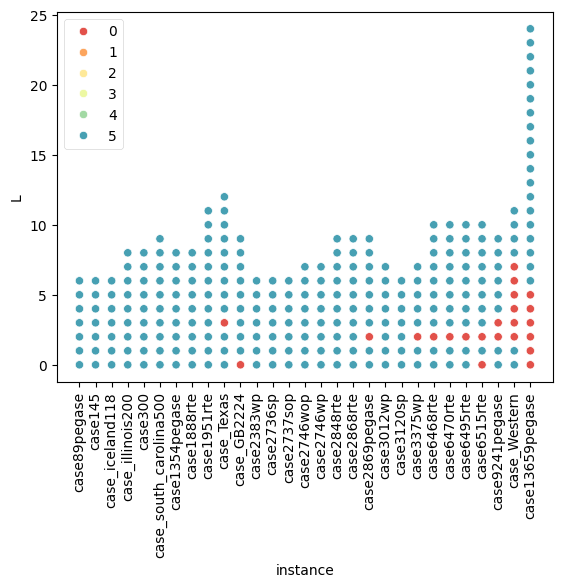

In [12]:
sns.scatterplot(x=brimkov_df.instance, y=brimkov_df.L, 
                hue=brimkov_df.result, hue_order=labels, palette=palette)
plt.xticks(rotation=90)
plt.style.use('ggplot') 
plt.legend(facecolor="white", loc=2)
plt.show()

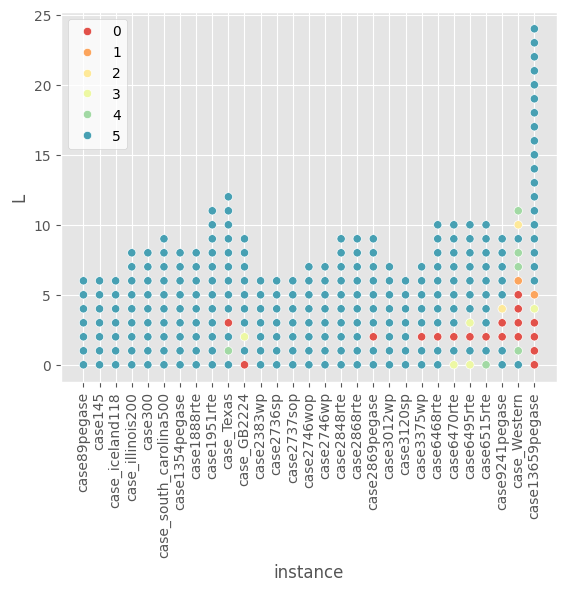

In [13]:
sns.scatterplot(x=cycles_df.instance, y=cycles_df.L, 
                hue=cycles_df.result, hue_order=labels, palette=palette)
plt.xticks(rotation=90)
plt.style.use('ggplot') 
plt.legend(facecolor="white", loc=2)
plt.show()

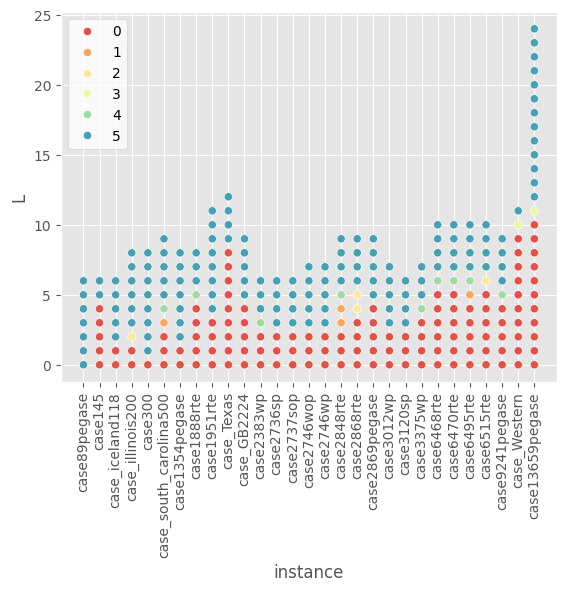

In [14]:
sns.scatterplot(x=forts_df.instance, y=forts_df.L, 
                hue=forts_df.result, hue_order=labels, palette=palette)
plt.xticks(rotation=90)
plt.style.use('ggplot') 
plt.legend(facecolor="white", loc=2)
plt.show()

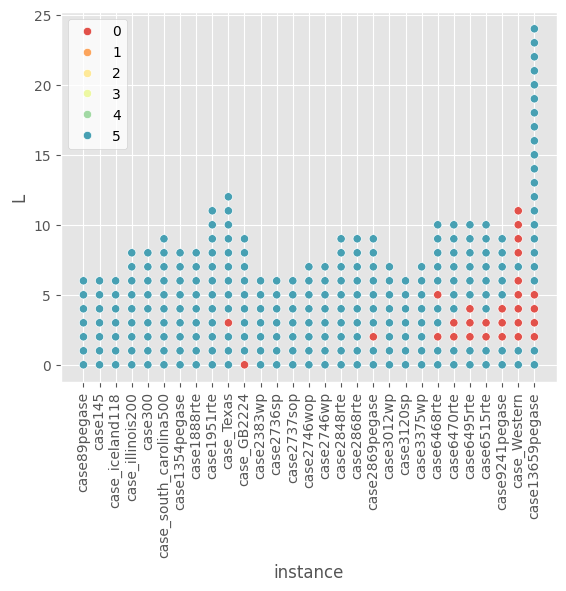

In [15]:
sns.scatterplot(x=jovanovic_df.instance, y=jovanovic_df.L, 
                hue=jovanovic_df.result, hue_order=labels, palette=palette)
plt.xticks(rotation=90)
plt.style.use('ggplot') 
plt.legend(facecolor="white", loc=2)
plt.show()

## Best solver

In [16]:
df3 = brimkov_df.merge(cycles_df, on=["instance","vertices","edges","propagating_vertices","L"],
                       suffixes=["", "_cycles"])
df3 = df3.merge(forts_df, on=["instance","vertices","edges","propagating_vertices","L"],
                suffixes=["", "_forts"])
df3 = df3.merge(jovanovic_df, on=["instance","vertices","edges","propagating_vertices","L"],
                suffixes=["_brimkov", "_jovanovic"])
df3

,instance,vertices,edges,propagating_vertices,solver_brimkov,L,variables_brimkov,constraints_brimkov,result_brimkov,gap_all_brimkov,...,upper_bound_forts,solver_jovanovic,variables_jovanovic,constraints_jovanovic,result_jovanovic,gap_all_jovanovic,gap_feas_jovanovic,time_all_jovanovic,time_opt_jovanovic,upper_bound_jovanovic
0,case89pegase,89,206,43,brimkov,0,710,682,5,0.0,...,47.0,jovanovic,710,1379,5,0.0,NaN,0.012866,0.012866,47.0
1,case89pegase,89,206,43,brimkov,1,710,682,5,0.0,...,34.0,jovanovic,710,1379,5,0.0,NaN,0.037248,0.037248,34.0
2,case89pegase,89,206,43,brimkov,2,710,682,5,0.0,...,21.0,jovanovic,710,1379,5,0.0,NaN,0.081253,0.081253,21.0
3,case89pegase,89,206,43,brimkov,3,710,682,5,0.0,...,17.0,jovanovic,710,1379,5,0.0,NaN,0.074357,0.074357,17.0
4,case89pegase,89,206,43,brimkov,4,710,682,5,0.0,...,15.0,jovanovic,710,1379,5,0.0,NaN,0.070439,0.070439,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,case13659pegase,13659,18625,4024,brimkov,20,77073,93003,5,0.0,...,2729.0,jovanovic,77073,166797,5,0.0,NaN,125.819119,125.819119,2729.0
279,case13659pegase,13659,18625,4024,brimkov,21,77073,93003,5,0.0,...,2726.0,jovanovic,77073,166797,5,0.0,NaN,125.808138,125.808138,2726.0
280,case13659pegase,13659,18625,4024,brimkov,22,77073,93003,5,0.0,...,2724.0,jovanovic,77073,166797,5,0.0,NaN,141.739335,141.739335,2724.0
281,case13659pegase,13659,18625,4024,brimkov,23,77073,93003,5,0.0,...,2722.0,jovanovic,77073,166797,5,0.0,NaN,120.913032,120.913032,2722.0


In [17]:
# First criterior: more solved instances
# Second criterion: less time 
# Third criterion: less upper bound
def compare(t1, t2):
    if t1[1] > t2[1]:
        return -1
    elif t1[1] < t2[1]:
        return 1
    if t1[2] < t2[2]:
        return -1
    elif t1[2] > t2[2]:
        return 1
    if t1[3] < t2[3]:
        return -1
    elif t1[3] > t2[3]:
        return 1
    return 0

def get_winner(serie):
    ls = [(serie["solver"+solver], 
           serie["result"+solver], 
           serie["time_opt"+solver], 
           serie["upper_bound"+solver]) 
          for solver in ("_brimkov", "_cycles", "_forts", "_jovanovic")]
    ls = sorted(ls, key=functools.cmp_to_key(compare))
    return ls[0][0]
    
df3["winner"] = df3.apply(get_winner, axis=1)
df3[["instance", "L", "winner"]]

,instance,L,winner
0,case89pegase,0,jovanovic
1,case89pegase,1,jovanovic
2,case89pegase,2,brimkov
3,case89pegase,3,brimkov
4,case89pegase,4,cycles
...,...,...,...
278,case13659pegase,20,brimkov
279,case13659pegase,21,brimkov
280,case13659pegase,22,brimkov
281,case13659pegase,23,brimkov


      winner  number
0    brimkov      84
1     cycles     101
2      forts      58
3  jovanovic      40


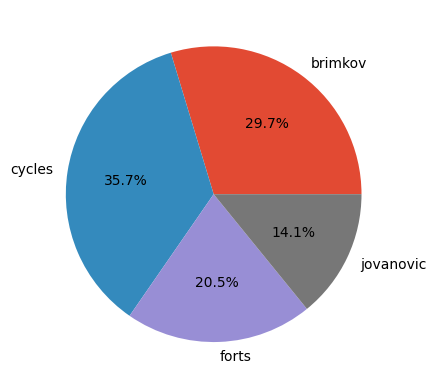

In [18]:
df4 = df3.groupby("winner", as_index=False).agg(number = ("instance","count"))
print(df4)
plt.pie(df4.number, labels=df4.winner, autopct='%1.1f%%')
plt.show()

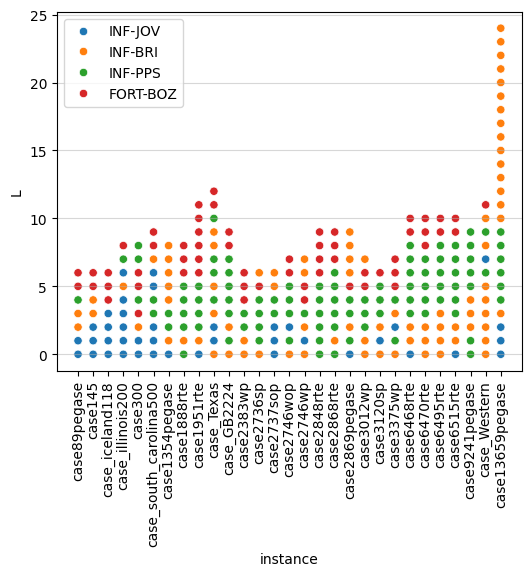

In [53]:
legend_map = {"jovanovic": 'INF-JOV',
              "brimkov": 'INF-BRI',
              "forts": 'FORT-BOZ',
              "cycles": 'INF-PPS'}
plt.figure(figsize=(6, 6))
ax = plt.gca()
ax.set_aspect(0.9)
sns.scatterplot(x=df3.instance, y=df3.L, hue=df3.winner.map(legend_map))
plt.grid(alpha=0.5,zorder=1,axis='y')
plt.xticks(rotation=90)
plt.style.use('default') 
plt.legend()
plt.show()

In [20]:
df3["L_fraction"] = df3.apply(lambda row: row.L / L_star[row.instance], axis=1)
df3

,instance,vertices,edges,propagating_vertices,solver_brimkov,L,variables_brimkov,constraints_brimkov,result_brimkov,gap_all_brimkov,...,variables_jovanovic,constraints_jovanovic,result_jovanovic,gap_all_jovanovic,gap_feas_jovanovic,time_all_jovanovic,time_opt_jovanovic,upper_bound_jovanovic,winner,L_fraction
0,case89pegase,89,206,43,brimkov,0,710,682,5,0.0,...,710,1379,5,0.0,NaN,0.012866,0.012866,47.0,jovanovic,0.000000
1,case89pegase,89,206,43,brimkov,1,710,682,5,0.0,...,710,1379,5,0.0,NaN,0.037248,0.037248,34.0,jovanovic,0.166667
2,case89pegase,89,206,43,brimkov,2,710,682,5,0.0,...,710,1379,5,0.0,NaN,0.081253,0.081253,21.0,brimkov,0.333333
3,case89pegase,89,206,43,brimkov,3,710,682,5,0.0,...,710,1379,5,0.0,NaN,0.074357,0.074357,17.0,brimkov,0.500000
4,case89pegase,89,206,43,brimkov,4,710,682,5,0.0,...,710,1379,5,0.0,NaN,0.070439,0.070439,15.0,cycles,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,case13659pegase,13659,18625,4024,brimkov,20,77073,93003,5,0.0,...,77073,166797,5,0.0,NaN,125.819119,125.819119,2729.0,brimkov,0.833333
279,case13659pegase,13659,18625,4024,brimkov,21,77073,93003,5,0.0,...,77073,166797,5,0.0,NaN,125.808138,125.808138,2726.0,brimkov,0.875000
280,case13659pegase,13659,18625,4024,brimkov,22,77073,93003,5,0.0,...,77073,166797,5,0.0,NaN,141.739335,141.739335,2724.0,brimkov,0.916667
281,case13659pegase,13659,18625,4024,brimkov,23,77073,93003,5,0.0,...,77073,166797,5,0.0,NaN,120.913032,120.913032,2722.0,brimkov,0.958333


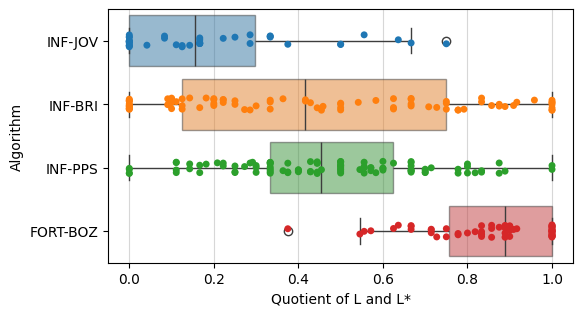

In [50]:
plt.figure(figsize=(6, 6))
ax = plt.gca()
ax.set_aspect(0.15)
sns.boxplot(x=df3.L_fraction, y=df3.winner.map(legend_map), hue=df3.winner.map(legend_map), boxprops={'alpha': 0.5})
sns.stripplot(x=df3.L_fraction, y=df3.winner.map(legend_map), hue=df3.winner.map(legend_map))
plt.style.use('default') 
plt.grid(alpha=0.5,zorder=1,axis='x')
plt.xlabel("Quotient of L and L*")
plt.ylabel("Algorithm")
plt.show()

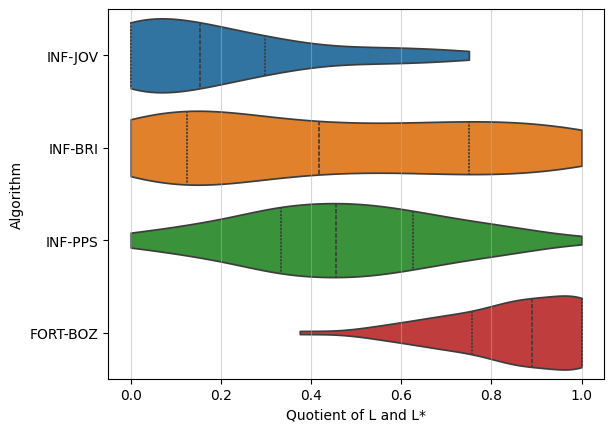

In [22]:
sns.violinplot(x=df3.L_fraction, y=df3.winner.map(legend_map), hue=df3.winner.map(legend_map), cut=0, inner="quart")
plt.style.use('default') 
plt.grid(alpha=0.5,zorder=1,axis='x')
plt.xlabel("Quotient of L and L*")
plt.ylabel("Algorithm")
plt.show()

## Execution times

In [69]:
brimkov_df = df[df.solver == "brimkov"]
cycles_df = df[df.solver == "cycles"]
forts_df = df[df.solver == "forts"]
jovanovic_df = df[df.solver == "jovanovic"]

In [70]:
df4 = brimkov_df.merge(cycles_df, on=["instance","vertices","edges","propagating_vertices","L","run"],
                       suffixes=["", "_cycles"])
df4 = df4.merge(forts_df, on=["instance","vertices","edges","propagating_vertices","L","run"],
                suffixes=["", "_forts"])
df4 = df4.merge(jovanovic_df, on=["instance","vertices","edges","propagating_vertices","L","run"],
                suffixes=["_brimkov", "_jovanovic"])
df4

,solver_brimkov,instance,vertices,edges,propagating_vertices,L,variables_brimkov,constraints_brimkov,run,lower_bound_brimkov,...,upper_bound_jovanovic,gap_jovanovic,result_jovanovic,nodes_jovanovic,t_solver_jovanovic,callbacks_jovanovic,t_callback_jovanovic,lazy_constraints_jovanovic,opt_val_jovanovic,L_star_jovanovic
0,brimkov,case89pegase,89,206,43,0,710,682,0,47.0,...,47.0,0.0,Optimal,1,0.015386,0,0.0,0,47.0,6
1,brimkov,case89pegase,89,206,43,0,710,682,1,47.0,...,47.0,0.0,Optimal,1,0.012552,0,0.0,0,47.0,6
2,brimkov,case89pegase,89,206,43,0,710,682,2,47.0,...,47.0,0.0,Optimal,1,0.011966,0,0.0,0,47.0,6
3,brimkov,case89pegase,89,206,43,0,710,682,3,47.0,...,47.0,0.0,Optimal,1,0.012083,0,0.0,0,47.0,6
4,brimkov,case89pegase,89,206,43,0,710,682,4,47.0,...,47.0,0.0,Optimal,1,0.012344,0,0.0,0,47.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,brimkov,case13659pegase,13659,18625,4024,24,77073,93003,0,2721.0,...,2721.0,0.0,Optimal,1776,149.261036,0,0.0,0,2721.0,24
1411,brimkov,case13659pegase,13659,18625,4024,24,77073,93003,1,2721.0,...,2721.0,0.0,Optimal,1776,149.298110,0,0.0,0,2721.0,24
1412,brimkov,case13659pegase,13659,18625,4024,24,77073,93003,2,2721.0,...,2721.0,0.0,Optimal,1776,149.440702,0,0.0,0,2721.0,24
1413,brimkov,case13659pegase,13659,18625,4024,24,77073,93003,3,2721.0,...,2721.0,0.0,Optimal,1776,149.053747,0,0.0,0,2721.0,24


In [77]:
modelos = ["jovanovic", "brimkov", "cycles", "forts"]

def optimal_times(df: pd.DataFrame, max_time : int = timeout, log_scale : bool = True):
    # Restrict dataframe
    df5= df[["t_solver_"+s for s in modelos]]
    # Replace NaN with Inf
    df5.replace(float("nan"), float("inf"), inplace=True)
    
    # Time instants
    times = [i/10 for i in range(0, 10*max_time)]
    # Empty dataframe
    df6 = pd.DataFrame(columns=["instant"]+modelos)
    # Fill dataframe
    df6["instant"] = times
    for modelo in modelos:
        df6[modelo] = times
    df6[modelos] = df6[modelos].apply(lambda row: df5[df5 <= row[modelos[0]]].count() / df5.count(), axis=1)
    
    # Graph
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    ax.set_aspect(2)
    for modelo in modelos:
        plt.plot(df6["instant"], df6[modelo], label=legend_map[modelo])
    if (log_scale):
        plt.xscale("log")
    plt.style.use('default') 
    plt.xlabel("Time (seconds)")
    plt.ylabel("Solved instances (%)")
    plt.ylim(top=1)
    plt.legend()
    plt.grid(alpha=0.5,zorder=1,axis='y')

/tmp/ipykernel_15351/2700174718.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.replace(float("nan"), float("inf"), inplace=True)


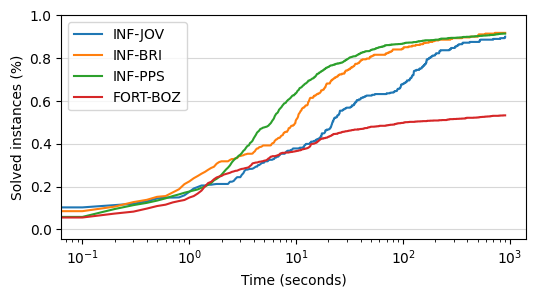

In [78]:
optimal_times(df4)

## Performance profile

In [25]:
modelos = df.solver.unique().tolist()

def performance_profile(df: pd.DataFrame, step: float = 0.1, log_scale : bool = True):
    # Restringir dataframes
    df5 = df[["time_opt_"+s for s in modelos]]
    # Dividimos cada fila por el mejor tiempo de la fila
    df5 = df5.apply(lambda row: row/row.min(), axis=1)
    # Calculamos el ratio máximo
    rM = ceil(df5.max(axis=None)) + 1
    # Reemplazamos los nan por inf
    df5.replace(float("nan"), float("inf"), inplace=True)
    
    # Vector de ratios
    ratios = np.arange(1, rM, step)
    # Dataframe vacio
    df6 = pd.DataFrame(columns=["ratio"]+modelos)
    # Llenamos el dataframe con los ratios
    df6["ratio"] = ratios
    for modelo in modelos:
        df6[modelo] = ratios
    # Llenamos las demás entradas del dataframe
    df6[modelos] = df6[modelos].apply(lambda row: find_prob(df5, row[modelos[0]]), axis=1)

    # Graficamos
    for modelo in modelos:
        plt.plot(df6["ratio"].values, df6[modelo].values)
        if (log_scale):
            plt.xscale("log")
        plt.xlabel("Ratio to best execution time, r")
        plt.ylabel("Probability of achieving a ratio < r");
        plt.legend([modelo for modelo in modelos]);
    
# Funcion que calcula los ratios
def find_prob(df, r):
    return df[df <= r].count() / df.count()    

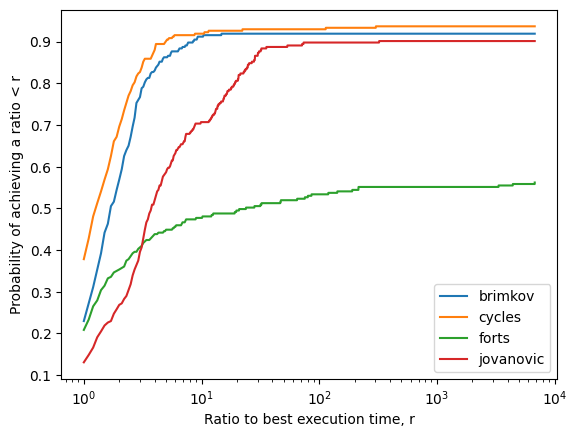

In [26]:
performance_profile(df3)